In [206]:
%%bash
mkdir -p /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks
mkdir -p /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/counts
mkdir -p /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/logs
mkdir -p /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/plots

First, quantify reads in targeted regions

In [16]:
%%bash
module load bedtools2
# Create union peakset for FLAG-p300 samples:
cat /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_p300.flag.{targeted,scram,PBS}.rep*.masked.dedup.sorted_peaks.narrowPeak \
| /bin/grep "^chr" \
| sort -k1,1 -k2,2n \
| bedtools merge -nonamecheck -i stdin \
| sort -k1,1 -k2,2n \
| bedtools closest \
    -nonamecheck \
    -a stdin \
    -b <(sort -k1,1 -k2,2n /data/reddylab/Reference_Data/Gencode/vM19/gencode.vM19.basic.annotation.no_gm.bed) \
> /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_p300.flag.union_peakset.bed

In [24]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex
python /data/reddylab/Alex/reddylab_utils/scripts/bed_to_saf.py \
    -beds  /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_p300.flag.union_peakset.bed \
    -safs  /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_p300.flag.union_peakset.saf
    

In [28]:
%%bash
/data/reddylab/software/subread-1.4.6-p4-Linux-x86_64/bin/featureCounts \
    -F SAF \
    -a /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_p300.flag.union_peakset.saf \
    -o /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/counts/mmLiver_p300.flag.union_peakset.featureCounts.txt \
    /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_p300.flag.{targeted,scram,PBS}.rep*masked.dedup.sorted.bam  \
> /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/logs/mmLiver_p300.flag.union_peakset.featureCounts.out \
2>&1


Same, but discarding peaks that are also found in input controls (artifacts!)

In [22]:
%%bash
module load bedtools2
# Create union peakset for FLAG-p300 samples:
cat /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_p300.flag.{targeted,scram,PBS}.rep*.masked.dedup.sorted_peaks.narrowPeak \
| /bin/grep "^chr" \
| sort -k1,1 -k2,2n \
| bedtools merge -nonamecheck -i stdin \
| sort -k1,1 -k2,2n \
| bedtools intersect -wa -v -a stdin -b /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_p300.[Ii]nput.{targeted,scram,PBS}.rep*.masked.dedup.sorted_peaks.narrowPeak \
| bedtools closest \
    -nonamecheck \
    -a stdin \
    -b <(sort -k1,1 -k2,2n /data/reddylab/Reference_Data/Gencode/vM19/gencode.vM19.basic.annotation.no_gm.bed) \
> /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_p300.flag.union_peakset_no_input.bed

***** WARNING: File /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_p300.input.targeted.rep6.masked.dedup.sorted_peaks.narrowPeak has inconsistent naming convention for record:
chr1	16008185	16008325	mmLiver_p300.input.rep6.masked.dedup.sorted_peak_38	100	.	7.29233	15.18408	10.01622	101

***** WARNING: File /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_p300.input.targeted.rep6.masked.dedup.sorted_peaks.narrowPeak has inconsistent naming convention for record:
chr1	16008185	16008325	mmLiver_p300.input.rep6.masked.dedup.sorted_peak_38	100	.	7.29233	15.18408	10.01622	101



In [24]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex
python /data/reddylab/Alex/reddylab_utils/scripts/bed_to_saf.py \
    -beds  /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_p300.flag.union_peakset_no_input.bed \
    -safs  /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_p300.flag.union_peakset_no_input.saf
    

In [25]:
%%bash
/data/reddylab/software/subread-1.4.6-p4-Linux-x86_64/bin/featureCounts \
    -F SAF \
    -a /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_p300.flag.union_peakset_no_input.saf \
    -o /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/counts/mmLiver_p300.flag.union_peakset_no_input.featureCounts.txt \
    /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_p300.flag.{targeted,scram,PBS}.rep*masked.dedup.sorted.bam  \
> /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/logs/mmLiver_p300.flag.union_peakset_no_input.featureCounts.out \
2>&1


Quantify K27ac in 

In [ ]:
mid_point = (106463479+106465480)/2
print mid_point - 500,  mid_point + 500

In [8]:
%%writefile /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver.flag.2kb.saf
chr4_106463479_106465480_Pcsk9	chr4	106463479	106465480	+
chr5_147268985_147270986_Pdx1	chr5	147268985	147270986	+
chr14_76877399_76877806_scrampeak	chr14	76876602	76878602	+


Overwriting /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver.flag.2kb.saf


Add the single peak from the scram nontargeting guide that seems to be an offtarget. Trying to answer the question, does it have K9me3/p300 signal?

In [5]:
midpoint_scrampeak = int((76877399+76877806)/2.)

In [11]:
win_size=250
print 'chr14', midpoint_scrampeak-win_size, midpoint_scrampeak+win_size 

chr14 76877352 76877852


In [10]:
%%writefile /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver.flag.1kb.saf
chr4_106463479_106465480_Pcsk9	chr4	106463979	106464980	+
chr5_147268985_147270986_Pdx1	chr5	147269485	147270486	+
chr14_76877399_76877806_scrampeak	chr14	76877102	76878102	+


Overwriting /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver.flag.1kb.saf


In [12]:
%%writefile /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver.flag.500bp.saf
chr4_106463479_106465480_Pcsk9	chr4	106464229	106464730	+
chr5_147268985_147270986_Pdx1	chr5	147269735	147270236	+
chr14_76877399_76877806_scrampeak	chr14	76877352	76877852	+


Overwriting /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver.flag.500bp.saf


In [13]:
%%bash
WINDOWS=(2kb 1kb 500bp)
sbatch -pnew,all \
    --array=0-2 \
    -o /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/logs/mmLiver.flag.2kb_no_input.featureCounts.%a.out \
    --cpus-per-task 4 \
    --mem 8G \
    <<'EOF'
#!/bin/bash
WINDOWS=(2kb 1kb 500bp)
WINDOW=${WINDOWS[${SLURM_ARRAY_TASK_ID}]}
/data/reddylab/software/subread-1.4.6-p4-Linux-x86_64/bin/featureCounts \
    -T 4 \
    -F SAF \
    -a /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver.flag.${WINDOW}.saf \
    -o /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/counts/mmLiver.flag.${WINDOW}_no_input.featureCounts.txt \
    /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_{p300.K27ac,KRAB.K9me3}.{targeted,scram,PBS}.rep*masked.dedup.sorted.bam 
EOF

Submitted batch job 17478458


In [14]:
%matplotlib inline

---=== 1kb ===---
=== KRAB.K9me3 stats ===
--- ANOVA ---
targeted vs scram	F_onewayResult(statistic=8.002691617435232, pvalue=0.030000984000889703)
targeted vs pbs	F_onewayResult(statistic=0.9287158806827276, pvalue=0.37945722819888106)
scram vs pbs	F_onewayResult(statistic=14.475201210316094, pvalue=0.012568849741742018)
--- t-test ---
targeted vs scram	Ttest_indResult(statistic=-2.8289028999658563, pvalue=0.030000984000889675)
targeted vs pbs	Ttest_indResult(statistic=0.9636990612648368, pvalue=0.3794572281988808)
scram vs pbs	Ttest_indResult(statistic=3.8046289188718667, pvalue=0.012568849741741998)
---=== 1kb ===---


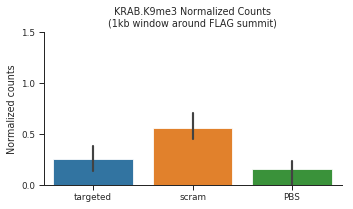

In [18]:
from scipy.stats import ttest_ind, f_oneway
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper')
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.markersize'] = 5

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

def get_stats(a, b, method = 'anova'):
    if method == 'anova':
        return f_oneway(a, b)
    elif method == 'ttest_ind':
        return ttest_ind(a, b)
    else:
        return "%s not implemented" % method
    
for window in ['1kb']:#'2kb', '1kb', '500bp'
    df = pd.read_csv('/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/counts/mmLiver.flag.%s_no_input.featureCounts.txt' % window, sep="\t", comment="#")

    lib_sizes = []
    for bam in df.columns.values[6:-1]:
        tt = np.loadtxt(bam.replace('masked.dedup.sorted.bam', 'bowtie.log.read_count.mapped'))
        lib_sizes.append(tt[1])

    df.loc[:, df.columns.values[6:-1]] = df.loc[:, df.columns.values[6:-1]]/lib_sizes*1e6

    df.index = df.iloc[:, 0] 

    # p300.K27ac.
    # KRAB.K9me3.
    df.columns = df.columns\
        .str.replace('/data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_','')\
        .str.replace('/data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_','')\
        .str.replace('.masked.dedup.sorted.bam','')

    df = df.loc[:,  df.columns.values[6:-1]]

    df.columns = pd.MultiIndex.from_arrays([
        ['.'.join(c.split('.')[:2]) for c in df.columns], 
        [c.split('.')[2] for c in df.columns], 
        df.columns
    ])

    factors = ['p300.K27ac', 'KRAB.K9me3', 'KRAB.K9me3'][::-1]
    peaks = ['chr5_147268985_147270986_Pdx1', 'chr4_106463479_106465480_Pcsk9', 'chr14_76877399_76877806_scrampeak'][::-1]
    print "---===", window, "===---"
    for f_ix, factor in enumerate(factors[:1]):
        figg = plt.figure(figsize=[5,3])
        df_tmp = df.T.loc[df.T.index.get_level_values(0)==factor,: ]
#         df_tmp = df_tmp.loc[df_tmp.index.get_level_values(2) != 'p300.K27ac.targeted.rep9', :]
        ax = sns.barplot(data=df_tmp, 
                         x=df_tmp.index.get_level_values(1), 
                         y=peaks[f_ix],
                         n_boot=1000)
        ax.set_ylabel('Normalized counts')
        ax.set_yticks(np.arange(0, 3, .5))
        simpleaxis(ax)
        data_dir = '/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/plots'
        ax.set_title('%s Normalized Counts\n(%s window around FLAG summit)' % (factor, window))
        figg.tight_layout()
        figg.savefig("%s/mmLiver_%s.%s.cpms.pdf" % (data_dir, factor, window))
        df_tmp.to_csv("%s/mmLiver_%s.%s.cpms.txt" % (data_dir, factor, window), sep='\t')
        targeted_values = df_tmp.loc[df_tmp.index.get_level_values(1)=='targeted', peaks[f_ix]].values
        scram_values = df_tmp.loc[df_tmp.index.get_level_values(1)=='scram', peaks[f_ix]].values
        pbs_values = df_tmp.loc[df_tmp.index.get_level_values(1)=='PBS', peaks[f_ix]].values
        plt.ylim([0, 1.5])

        print "=== %s stats ===" % factor
        print "--- ANOVA ---"
        print "targeted vs scram\t", get_stats(targeted_values, scram_values, method = 'anova')
        print "targeted vs pbs\t",get_stats(targeted_values, pbs_values, method = 'anova')
        print "scram vs pbs\t",get_stats(scram_values, pbs_values, method = 'anova')
        print "--- t-test ---"
        print "targeted vs scram\t", get_stats(targeted_values, scram_values, method = 'ttest_ind')
        print "targeted vs pbs\t",get_stats(targeted_values, pbs_values, method = 'ttest_ind')
        print "scram vs pbs\t",get_stats(scram_values, pbs_values, method = 'ttest_ind')
    print "---===", window, "===---"




In [8]:
df.head()

p300.K27ac  \
                                               targeted   
                               p300.K27ac.targeted.rep6   
Geneid                                                    
chr4_106463479_106465480_Pcsk9                 1.486348   
chr5_147268985_147270986_Pdx1                  0.153760   

                                                         \
                                                          
                               p300.K27ac.targeted.rep7   
Geneid                                                    
chr4_106463479_106465480_Pcsk9                 2.584946   
chr5_147268985_147270986_Pdx1                  0.280972   

                                                         \
                                                          
                               p300.K27ac.targeted.rep8   
Geneid                                                    
chr4_106463479_106465480_Pcsk9                 1.312902   
chr5_147268985_147270986_Pdx1                  0.251407   

                                                                               \
                                                                        scram   
                               p300.K27ac.targeted.rep9 p300.K27ac.scram.rep1   
Geneid                                                                          
chr4_106463479_106465480_Pcsk9                 0.680244              0.620070   
chr5_147268985_147270986_Pdx1                  0.558149              0.077509   

                                                                            \
                                                                             
                               p300.K27ac.scram.rep2 p300.K27ac.scram.rep3   
Geneid                                                                       
chr4_106463479_106465480_Pcsk9              1.662395              1.065994   
chr5_147268985_147270986_Pdx1               0.091090              0.154492   

                                                                           \
                                                                      PBS   
                               p300.K27ac.scram.rep5 p300.K27ac.PBS.rep10   
Geneid                                                                      
chr4_106463479_106465480_Pcsk9              3.340008             1.274404   
chr5_147268985_147270986_Pdx1               0.079524             0.035400   

                                                            ...          \
                                                            ...           
                               p300.K27ac.PBS.rep11         ...           
Geneid                                                      ...           
chr4_106463479_106465480_Pcsk9             0.917919         ...           
chr5_147268985_147270986_Pdx1              0.217402         ...           

                                             KRAB.K9me3  \
                                               targeted   
                               KRAB.K9me3.targeted.rep5   
Geneid                                                    
chr4_106463479_106465480_Pcsk9                 0.582975   
chr5_147268985_147270986_Pdx1                  0.112834   

                                                         \
                                                          
                               KRAB.K9me3.targeted.rep6   
Geneid                                                    
chr4_106463479_106465480_Pcsk9                 0.684039   
chr5_147268985_147270986_Pdx1                  0.146580   

                                                         \
                                                          
                               KRAB.K9me3.targeted.rep7   
Geneid                                                    
chr4_106463479_106465480_Pcsk9                 0.811225   
chr5_147268985_147270986_Pdx1                  0.062402   

                                             

---=== 1kb ===---
=== KRAB.K9me3 stats ===
--- ANOVA ---
targeted vs scram	F_onewayResult(statistic=8.002691617435232, pvalue=0.030000984000889703)
targeted vs pbs	F_onewayResult(statistic=0.9287158806827276, pvalue=0.37945722819888106)
scram vs pbs	F_onewayResult(statistic=14.475201210316094, pvalue=0.012568849741742018)
--- t-test ---
targeted vs scram	Ttest_indResult(statistic=-2.8289028999658563, pvalue=0.030000984000889675)
targeted vs pbs	Ttest_indResult(statistic=0.9636990612648368, pvalue=0.3794572281988808)
scram vs pbs	Ttest_indResult(statistic=3.8046289188718667, pvalue=0.012568849741741998)
=== KRAB.K9me3 stats ===
--- ANOVA ---
targeted vs scram	F_onewayResult(statistic=13.388371131455662, pvalue=0.01059190910543689)
targeted vs pbs	F_onewayResult(statistic=111.57141128797183, pvalue=0.00013139987269340515)
scram vs pbs	F_onewayResult(statistic=2.1147057857671965, pvalue=0.2056378680468689)
--- t-test ---
targeted vs scram	Ttest_indResult(statistic=3.6590123163848, pvalue=

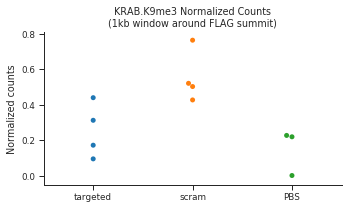

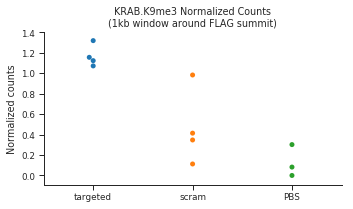

In [20]:
from scipy.stats import ttest_ind, f_oneway
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper')
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.markersize'] = 5

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

def get_stats(a, b, method = 'anova'):
    if method == 'anova':
        return f_oneway(a, b)
    elif method == 'ttest_ind':
        return ttest_ind(a, b)
    else:
        return "%s not implemented" % method
    
for window in ['1kb']:#['2kb', '1kb', '500bp']:
    df = pd.read_csv('/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/counts/mmLiver.flag.%s_no_input.featureCounts.txt' % window, sep="\t", comment="#")

    lib_sizes = []
    for bam in df.columns.values[6:-1]:
        tt = np.loadtxt(bam.replace('masked.dedup.sorted.bam', 'bowtie.log.read_count.mapped'))
        lib_sizes.append(tt[1])

    df.loc[:, df.columns.values[6:-1]] = df.loc[:, df.columns.values[6:-1]]/lib_sizes*1e6

    df.index = df.iloc[:, 0] 

    # p300.K27ac.
    # KRAB.K9me3.
    df.columns = df.columns\
        .str.replace('/data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_','')\
        .str.replace('/data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_','')\
        .str.replace('.masked.dedup.sorted.bam','')

    df = df.loc[:,  df.columns.values[6:-1]]

    df.columns = pd.MultiIndex.from_arrays([
        ['.'.join(c.split('.')[:2]) for c in df.columns], 
        [c.split('.')[2] for c in df.columns], 
        df.columns
    ])

    factors = ['p300.K27ac', 'KRAB.K9me3', 'KRAB.K9me3'][::-1]
    peaks = ['chr5_147268985_147270986_Pdx1', 'chr4_106463479_106465480_Pcsk9', 'chr14_76877399_76877806_scrampeak'][::-1]
    print "---===", window, "===---"
    for f_ix, factor in enumerate(factors[:2]):
        figg = plt.figure(figsize=[5,3])
        df_tmp = df.T.loc[df.T.index.get_level_values(0)==factor,: ]
#         df_tmp = df_tmp.loc[df_tmp.index.get_level_values(2) != 'p300.K27ac.targeted.rep9', :]
        ax = sns.swarmplot(data=df_tmp, 
                         x=df_tmp.index.get_level_values(1), 
                         y=peaks[f_ix])
        ax.set_ylabel('Normalized counts')
#         ax.set_yticks(np.arange(0, 3, .5))
        simpleaxis(ax)
        data_dir = '/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/plots'
        ax.set_title('%s Normalized Counts\n(%s window around FLAG summit)' % (factor, window))
        figg.tight_layout()
        figg.savefig("%s/mmLiver_%s.%s.cpms.points.pdf" % (data_dir, factor, window))

        targeted_values = df_tmp.loc[df_tmp.index.get_level_values(1)=='targeted', peaks[f_ix]].values
        scram_values = df_tmp.loc[df_tmp.index.get_level_values(1)=='scram', peaks[f_ix]].values
        pbs_values = df_tmp.loc[df_tmp.index.get_level_values(1)=='PBS', peaks[f_ix]].values


        print "=== %s stats ===" % factor
        print "--- ANOVA ---"
        print "targeted vs scram\t", get_stats(targeted_values, scram_values, method = 'anova')
        print "targeted vs pbs\t",get_stats(targeted_values, pbs_values, method = 'anova')
        print "scram vs pbs\t",get_stats(scram_values, pbs_values, method = 'anova')
        print "--- t-test ---"
        print "targeted vs scram\t", get_stats(targeted_values, scram_values, method = 'ttest_ind')
        print "targeted vs pbs\t",get_stats(targeted_values, pbs_values, method = 'ttest_ind')
        print "scram vs pbs\t",get_stats(scram_values, pbs_values, method = 'ttest_ind')
    print "---===", window, "===---"




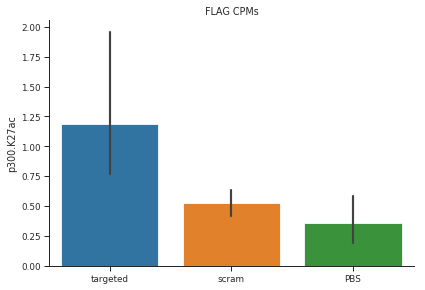

In [110]:
ax = sns.barplot(data=df.T.loc[df.T.index.get_level_values(0)=='p300.K27ac',: ], 
            x=df.T.loc[df.T.index.get_level_values(0)=='p300.K27ac',: ].index.get_level_values(1), 
            y='chr5_147268985_147270986_Pdx1')
ax.set_ylabel('p300.K27ac')
simpleaxis(ax)
data_dir = '/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/plots'
plt.tight_layout()
plt.title('FLAG CPMs')
plt.savefig("%s/mmLiver_p300.K27ac.2kb.cpms.pdf" % (data_dir))


In [23]:
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper')
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/counts/mmLiver_p300.flag.union_peakset_no_input.featureCounts.txt', sep="\t", comment="#")
df_anno = pd.read_csv('/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_p300.flag.union_peakset.bed', sep='\t', 
                      header=None)
df_anno = df_anno.drop(columns=range(3,9) + [10], axis=1)
df_anno.columns = ['Chr', 'Start', 'End', 'GeneSymbol']
df = df.merge(df_anno)


lib_sizes = []
for bam in df.columns.values[6:-1]:
    tt = np.loadtxt(bam.replace('masked.dedup.sorted.bam', 'bowtie.log.read_count.mapped'))
    lib_sizes.append(tt[1])

df.loc[:, df.columns.values[6:-1]] = df.loc[:, df.columns.values[6:-1]]/lib_sizes*1e6

df.index = df.Geneid + "_" + df.GeneSymbol 
df = df[~df.index.str.contains('chrM')]

# Remove Mitochondrial peaks
df = df[~df.index.str.contains('chrM')]

df.columns = df.columns.str\
    .replace('/data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_p300.flag.','')\
    .str.replace('.masked.dedup.sorted.bam','')

df = df.loc[:,  df.columns.values[6:-1]]

df.columns = pd.MultiIndex.from_arrays( [[c.split('.')[0] for c in df.columns], df.columns])

In [3]:
df.loc[df.var(axis=1).sort_values(ascending=False).index, :]

targeted                \
                                        targeted.rep6 targeted.rep7   
chr5_147269830_147270140_Plut                0.957399      1.871126   
chr5_147269830_147270140_Pdx1                0.957399      1.871126   
chr4_136147818_136148122_Id3                 0.299187      0.680410   
chr3_129198829_129199220_Pitx2               0.418862      0.085051   
chr2_80902522_80902687_Nup35                 0.000000      0.042526   
chr10_84340393_84340559_Nuak1                0.059837      0.000000   
chr4_109165768_109165933_Osbpl9              0.000000      0.212628   
chr8_41391766_41391931_Frg1                  0.000000      0.042526   
chr10_82806847_82807012_1700028I16Rik        0.000000      0.127577   
chr5_120806642_120806807_Oas1c               0.119675      0.085051   
chr4_132177462_132177701_Ythdf2              0.059837      0.042526   
chr1_60920607_60920772_Ctla4                 0.119675      0.085051   
chr2_25501007_25501236_Fbxw5                 0.179512      0.297679   
chr2_25501007_25501236_C8g                   0.179512      0.297679   
chr6_11976019_11976184_Phf14                 0.000000      0.000000   
chr18_35048761_35049001_Ctnna1               0.000000      0.000000   
chr10_123075944_123076099_Mon2               0.000000      0.127577   
chr1_156480833_156481074_Soat1               0.059837      0.000000   
chr7_44850086_44850267_Akt1s1                0.179512      0.127577   
chr8_119635756_119635911_Kcng4               0.179512      0.042526   
chr2_30982534_30982709_Usp20                 0.478699      0.085051   
chr1_192449733_192449888_Kcnh1               0.000000      0.042526   
chr16_31080158_31080313_Xxylt1               0.119675      0.212628   
chr9_51964765_51964947_Fdx1                  0.119675      0.127577   
chr11_62249007_62249162_Adora2b              0.179512      0.085051   
chr1_133854571_133854726_Optc                0.000000      0.212628   
chr19_8923268_8923423_B3gat3                 0.059837      0.255154   
chr10_20695173_20695328_Pde7b                0.000000      0.127577   
chr6_113076071_113076231_Gt(ROSA)26Sor       0.299187      0.042526   
chr10_94527248_94527413_Tmcc3                0.000000      0.085051   
...                                               ...           ...   
chr4_33052943_33053110_Ube2j1                0.000000      0.085051   
chr8_26498440_26498600_2310008N11Rik         0.119675      0.042526   
chr2_33270907_33271092_Ralgps1               0.059837      0.170102   
chr11_24250324_24250506_Bcl11a               0.000000      0.000000   
chr10_40736265_40736431_Mettl24              0.179512      0.042526   
chr3_126728092_126728252_Camk2d              0.000000      0.127577   
chr2_150825481_150825641_Pygb                0.000000      0.127577   
chr3_118745171_118745349_Dpyd                0.299187      0.000000   
chr13_24651208_24651387_Ripor2               0.239350      0.127577   
chr1_180821222_180821394_H3f3aos             0.000000      0.085051   
chr19_6245007_6245162_Atg2a                  0.179512      0.000000   
chr7_128111049_128111209_Itgam               0.059837      0.042526   
chr16_38598486_38598646_Arhgap31             0.239350      0.042526   
chr5_100767224_100767463_Helq                0.179512      0.127577   
chr10_86313436_86313598_Timp3                0.000000      0.127577   
chr10_86313436_86313598_Syn3                 0.000000      0.127577   
chr6_106312439_106312599_Cntn4               0.239350      0.085051   
chr11_107547564_107547725_A830035A12Rik      0.179512      0.212628   
chr3_87157737_87157897_Kirrel                0.059837      0.085051   
chr1_10128117_10128277_Cspp1                 0.059837      0.085051   
chr4_144976712_144976872_Vps13d              0.119675      0.127577   
chr2_153714716_153714876_Dnmt3c              0.059837      0.042526   
chr9_46129674_46129834_Sik3                  0.000000      0.170102   
chr15_13767712_13767872_Cdh6                 0.179512      0.085051  

/data/reddylab/software/miniconda2/envs/alex_dev/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


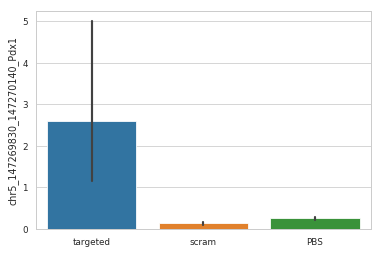

In [4]:
gene_of_interest = 'Pdx1'
sns.barplot(data=df.loc[df.index.str.contains(gene_of_interest),: ].T, 
            x=df.loc[df.index.str.contains(gene_of_interest),: ].T.index.get_level_values(0), 
            y='chr5_147269830_147270140_Pdx1')

In [24]:
foo

chr5_147269830_147270140_Pdx1
targeted targeted.rep6                       0.957399
         targeted.rep7                       1.871126
         targeted.rep8                       1.349949
         targeted.rep9                       6.205051
scram    scram.rep1                          0.132194
         scram.rep2                          0.174438
         scram.rep3                          0.100616
         scram.rep5                          0.086134
PBS      PBS.rep10                           0.185863
         PBS.rep11                           0.282426
         PBS.rep12                           0.242641
         PBS.rep4                            0.264609

In [6]:
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper')
import numpy as np
from matplotlib import pyplot as plt

df_krab = pd.read_csv('/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/counts/mmLiver_KRAB.flag.union_peakset_no_input.featureCounts.txt', sep="\t", comment="#")
df_krab_anno = pd.read_csv('/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_KRAB.flag.union_peakset.bed', sep='\t', 
                      header=None)
df_krab_anno = df_krab_anno.drop(columns=range(3,9) + [10], axis=1)
df_krab_anno.columns = ['Chr', 'Start', 'End', 'GeneSymbol']
df_krab = df_krab.merge(df_krab_anno)


lib_sizes = []
for bam in df_krab.columns.values[6:-1]:
    tt = np.loadtxt(bam.replace('masked.dedup.sorted.bam', 'bowtie.log.read_count.mapped'))
    lib_sizes.append(tt[1])

df_krab.loc[:, df_krab.columns.values[6:-1]] = df_krab.loc[:, df_krab.columns.values[6:-1]]/lib_sizes*1e6

df_krab.index = df_krab.Geneid + "_" + df_krab.GeneSymbol 
df_krab = df_krab[~df_krab.index.str.contains('chrM')]

# Remove Mitochondrial peaks
df_krab = df_krab[~df_krab.index.str.contains('chrM')]

df_krab.columns = df_krab.columns.str\
    .replace('/data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_KRAB.flag.','')\
    .str.replace('.masked.dedup.sorted.bam','')

df_krab = df_krab.loc[:,  df_krab.columns.values[6:-1]]

# Drop failed library
df_krab.drop('scram.rep8', axis=1, inplace=True)

df_krab.columns = pd.MultiIndex.from_arrays( [[c.split('.')[0] for c in df_krab.columns], df_krab.columns])

In [7]:
foo = df.loc[df.index.str.contains('Pdx1'),: ].T

In [8]:
foo_krab = df_krab.loc[df_krab.index.str.contains('Pcsk9'),: ].T

In [9]:
foo_merged = pd.concat([foo, foo_krab])

/gpfs/fs1/data/reddylab/software/miniconda2/envs/alex_dev/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [10]:
df.loc[df.index.str.contains('Pdx1'),: ].T

chr5_147269830_147270140_Pdx1
targeted targeted.rep6                       0.957399
         targeted.rep7                       1.871126
         targeted.rep8                       1.349949
         targeted.rep9                       6.205051
scram    scram.rep1                          0.132194
         scram.rep2                          0.174438
         scram.rep3                          0.100616
         scram.rep5                          0.086134
PBS      PBS.rep10                           0.185863
         PBS.rep11                           0.282426
         PBS.rep12                           0.242641
         PBS.rep4                            0.264609

In [38]:
foo_merged

chr4_106464226_106464732_Pcsk9  \
targeted targeted.rep6                             NaN   
         targeted.rep7                             NaN   
         targeted.rep8                             NaN   
         targeted.rep9                             NaN   
scram    scram.rep1                                NaN   
         scram.rep2                                NaN   
         scram.rep3                                NaN   
         scram.rep5                                NaN   
PBS      PBS.rep10                                 NaN   
         PBS.rep11                                 NaN   
         PBS.rep12                                 NaN   
         PBS.rep4                                  NaN   
targeted targeted.rep3                        2.449188   
         targeted.rep5                        3.408744   
         targeted.rep6                        2.804244   
         targeted.rep7                        1.620951   
scram    scram.rep10                          0.257165   
         scram.rep11                          0.165291   
         scram.rep9                           0.119047   
PBS      PBS.rep12                            0.214924   
         PBS.rep1                             0.507233   
         PBS.rep2                             0.271395   
         PBS.rep4                             0.651857   

                        chr5_147269830_147270140_Pdx1  
targeted targeted.rep6                       0.957399  
         targeted.rep7                       1.871126  
         targeted.rep8                       1.349949  
         targeted.rep9                       6.205051  
scram    scram.rep1                          0.132194  
         scram.rep2                          0.174438  
         scram.rep3                          0.100616  
         scram.rep5                          0.086134  
PBS      PBS.rep10                           0.185863  
         PBS.rep11                           0.282426  
         PBS.rep12                           0.242641  
         PBS.rep4                            0.264609  
targeted targeted.rep3                            NaN  
         targeted.rep5                            NaN  
         targeted.rep6                            NaN  
         targeted.rep7                            NaN  
scram    scram.rep10                              NaN  
         scram.rep11                              NaN  
         scram.rep9                               NaN  
PBS      PBS.rep12                                NaN  
         PBS.rep1                                 NaN  
         PBS.rep2                                 NaN  
         PBS.rep4                                 NaN

In [11]:
foo_merged.loc[:, 'locus'] = 1
foo_merged.loc[:, 'cpm'] = 1

/data/reddylab/software/miniconda2/envs/alex_dev/lib/python2.7/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


In [12]:
~foo_merged.chr4_106464226_106464732_Pcsk9.isna()

targeted  targeted.rep6    False
          targeted.rep7    False
          targeted.rep8    False
          targeted.rep9    False
scram     scram.rep1       False
          scram.rep2       False
          scram.rep3       False
          scram.rep5       False
PBS       PBS.rep10        False
          PBS.rep11        False
          PBS.rep12        False
          PBS.rep4         False
targeted  targeted.rep3     True
          targeted.rep5     True
          targeted.rep6     True
          targeted.rep7     True
scram     scram.rep10       True
          scram.rep11       True
          scram.rep9        True
PBS       PBS.rep12         True
          PBS.rep1          True
          PBS.rep2          True
          PBS.rep4          True
Name: chr4_106464226_106464732_Pcsk9, dtype: bool

In [13]:
foo_merged.loc[~foo_merged.chr4_106464226_106464732_Pcsk9.isna(), 'locus'] = 'Pcsk9'
foo_merged.loc[~foo_merged.chr5_147269830_147270140_Pdx1.isna(), 'locus'] = 'Pdx1'

In [14]:
foo_merged.chr4_106464226_106464732_Pcsk9.values

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 2.44918841, 3.40874444, 2.80424427,
       1.62095069, 0.25716472, 0.16529121, 0.11904713, 0.21492372,
       0.50723278, 0.27139512, 0.65185655])

In [15]:
foo_merged.loc[~foo_merged.chr4_106464226_106464732_Pcsk9.isna(), 'cpm'] = foo_merged.loc[~foo_merged.chr4_106464226_106464732_Pcsk9.isna(), 'chr4_106464226_106464732_Pcsk9']
foo_merged.loc[~foo_merged.chr5_147269830_147270140_Pdx1.isna(), 'cpm'] = foo_merged.loc[~foo_merged.chr5_147269830_147270140_Pdx1.isna(), 'chr5_147269830_147270140_Pdx1']

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


In [17]:
df.loc[df.index.str.contains('Pdx1'),: ].T

chr5_147269830_147270140_Pdx1
targeted targeted.rep6                       0.957399
         targeted.rep7                       1.871126
         targeted.rep8                       1.349949
         targeted.rep9                       6.205051
scram    scram.rep1                          0.132194
         scram.rep2                          0.174438
         scram.rep3                          0.100616
         scram.rep5                          0.086134
PBS      PBS.rep10                           0.185863
         PBS.rep11                           0.282426
         PBS.rep12                           0.242641
         PBS.rep4                            0.264609

In [47]:
(df.loc[:, [c for c in df.columns if 'targeted' in c ]].values).flatten()

array([0.05983744, 0.0850512 , 0.04218589, 0.08500069, 0.05983744,
       0.0850512 , 0.12655768, 0.17000139, 0.11967487, 0.0850512 ,
       0.16874358, 0.08500069, 0.        , 0.21262799, 0.12655768,
       0.12750104, 0.05983744, 0.        , 0.16874358, 0.17000139,
       0.        , 0.0850512 , 0.08437179, 0.08500069, 0.11967487,
       0.0425256 , 0.12655768, 0.04250035, 0.        , 0.0425256 ,
       0.04218589, 0.08500069, 0.        , 0.1275768 , 0.        ,
       0.12750104, 0.        , 0.0425256 , 0.04218589, 0.08500069,
       0.17951231, 0.0425256 , 0.        , 0.08500069, 0.        ,
       0.0850512 , 0.        , 0.12750104, 0.        , 0.1275768 ,
       0.08437179, 0.17000139, 0.05983744, 0.        , 0.08437179,
       0.08500069, 0.        , 0.1275768 , 0.04218589, 0.        ,
       0.        , 0.1275768 , 0.04218589, 0.        , 0.        ,
       0.0850512 , 0.08437179, 0.04250035, 0.        , 0.1275768 ,
       0.08437179, 0.21250173, 0.        , 0.        , 0.     

In [48]:
(df.loc[:, [c for c in df.columns if 'scram' in c ]].values).flatten()

array([0.08812903, 0.13082878, 0.05030804, 0.12920154, 0.04406452,
       0.08721919, 0.10061609, 0.12920154, 0.13219355, 0.08721919,
       0.        , 0.04306718, 0.08812903, 0.04360959, 0.15092413,
       0.55987335, 0.13219355, 0.08721919, 0.75462066, 0.04306718,
       0.04406452, 0.26165756, 0.05030804, 0.04306718, 0.08812903,
       0.17443838, 0.        , 0.12920154, 0.13219355, 0.08721919,
       0.70431261, 0.04306718, 0.08812903, 0.08721919, 0.55338848,
       0.04306718, 0.04406452, 0.13082878, 0.10061609, 0.08613436,
       0.04406452, 0.13082878, 0.15092413, 0.        , 0.13219355,
       0.04360959, 0.05030804, 0.04306718, 0.17625807, 0.04360959,
       0.10061609, 0.04306718, 0.04406452, 0.08721919, 0.10061609,
       0.04306718, 0.08812903, 0.08721919, 0.10061609, 0.04306718,
       0.08812903, 0.08721919, 0.10061609, 0.04306718, 0.5287742 ,
       0.        , 0.05030804, 0.12920154, 0.13219355, 0.04360959,
       0.8049287 , 0.08613436, 0.13219355, 0.08721919, 0.     

In [49]:
df.shape

(73, 12)

In [46]:
get_stats(
    (df.loc[:, [c for c in df.columns if 'targeted' in c ]].values).flatten(),
    (df.loc[:, [c for c in df.columns if 'scram' in c ]].values).flatten(),
    method = 'ttest_ind')

Ttest_indResult(statistic=1.0728224660174057, pvalue=0.28379540509580603)

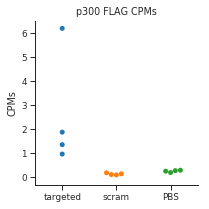

In [28]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42
f, ax = plt.subplots(figsize=[3, 3])
sns.swarmplot(data=df.loc[df.index.str.contains('Pdx1'),: ].T, 
                 x=df.loc[df.index.str.contains('Pdx1'),: ].T.index.get_level_values(0), y='chr5_147269830_147270140_Pdx1')
# sns.boxplot(data=df.loc[df.index.str.contains('Pdx1'),: ].T, 
#                  x=df.loc[df.index.str.contains('Pdx1'),: ].T.index.get_level_values(0), y='chr5_147269830_147270140_Pdx1')
ax.set_ylabel('CPMs')
simpleaxis(ax)
data_dir = '/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/plots'
plt.title('p300 FLAG CPMs');
plt.tight_layout()
plt.savefig("%s/mmLiver_p300.flag.union_peakset.cpms.points.pdf" % (data_dir))


In [21]:
df.loc[df.index.str.contains('Pdx1'),: ].T.to_csv("%s/mmLiver_p300.flag.union_peakset.cpms.txt" % (data_dir), sep='\t')

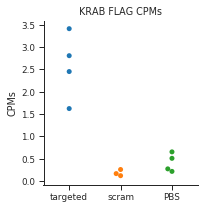

In [35]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42
f, ax = plt.subplots(figsize=[3, 3])
sns.swarmplot(data=df_krab.loc[df_krab.index.str.contains('Pcsk9'),: ].T, 
                 x=df_krab.loc[df_krab.index.str.contains('Pcsk9'),: ].T.index.get_level_values(0), y='chr4_106464226_106464732_Pcsk9')
# sns.boxplot(data=df_krab.loc[df_krab.index.str.contains('Pcsk9'),: ].T, 
#                  x=df_krab.loc[df_krab.index.str.contains('Pcsk9'),: ].T.index.get_level_values(0), y='chr5_147269830_147270140_Pcsk9')
ax.set_ylabel('CPMs')
simpleaxis(ax)
data_dir = '/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/plots'
plt.title('KRAB FLAG CPMs');
plt.tight_layout()
plt.savefig("%s/mmLiver_KRAB.flag.union_peakset.cpms.points.pdf" % (data_dir))


In [22]:
df_krab.loc[df_krab.index.str.contains('Pcsk9'),: ].T.to_csv("%s/mmLiver_KRAB.flag.union_peakset.cpms.txt" % (data_dir), sep='\t')

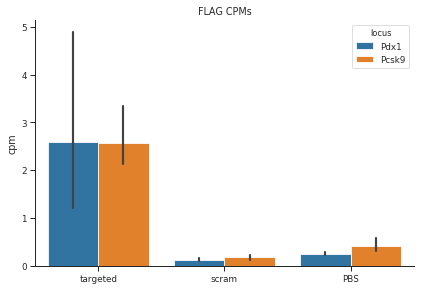

In [45]:
ax = sns.barplot(data=foo_merged, 
                 x=foo_merged.index.get_level_values(0), y='cpm', hue='locus',  n_boot=50)
simpleaxis(ax)
data_dir = '/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/plots'
plt.tight_layout()
plt.title('FLAG CPMs')
plt.savefig("%s/mmLiver_KRAB.flag.union_peakset.cpms.pdf" % (data_dir))


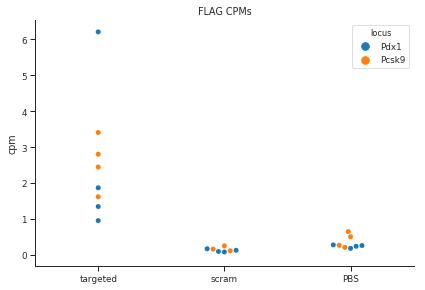

In [46]:
ax = sns.swarmplot(data=foo_merged, 
                 x=foo_merged.index.get_level_values(0), y='cpm', hue='locus')
simpleaxis(ax)
data_dir = '/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/plots'
plt.tight_layout()
plt.title('FLAG CPMs')
plt.savefig("%s/mmLiver_KRAB.flag.union_peakset.cpms.points.pdf" % (data_dir))


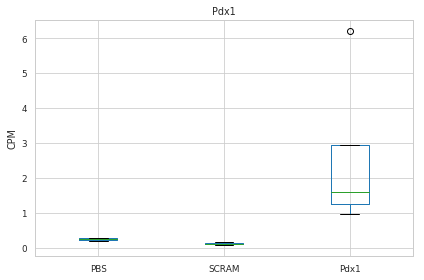

In [2]:
# Save plot for special case
gene_of_interest = 'Pdx1'
figg = plt.figure(figsize=[6,4])
fig = df.loc[df.index.str.contains(gene_of_interest),: ].T.groupby(level=0, axis=0)\
    .boxplot(
        subplots=False, 
    )
fig.axes.set_xticklabels(['PBS', 'SCRAM', 'Pdx1']);
fig.axes.set_title('Pdx1');
fig.set_ylabel('CPM')
figg.tight_layout()
figg.savefig('/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/plots/mmLiver_p300.flag.union_peakset.cpms.%s.pdf' % (gene_of_interest))

In [3]:
# Special case: Pdx1 peak overlaps 2 genes in the annotation, therefore appears twice. Remove "Plut"
df = df[df.index != 'chr5_147269830_147270140_Plut']


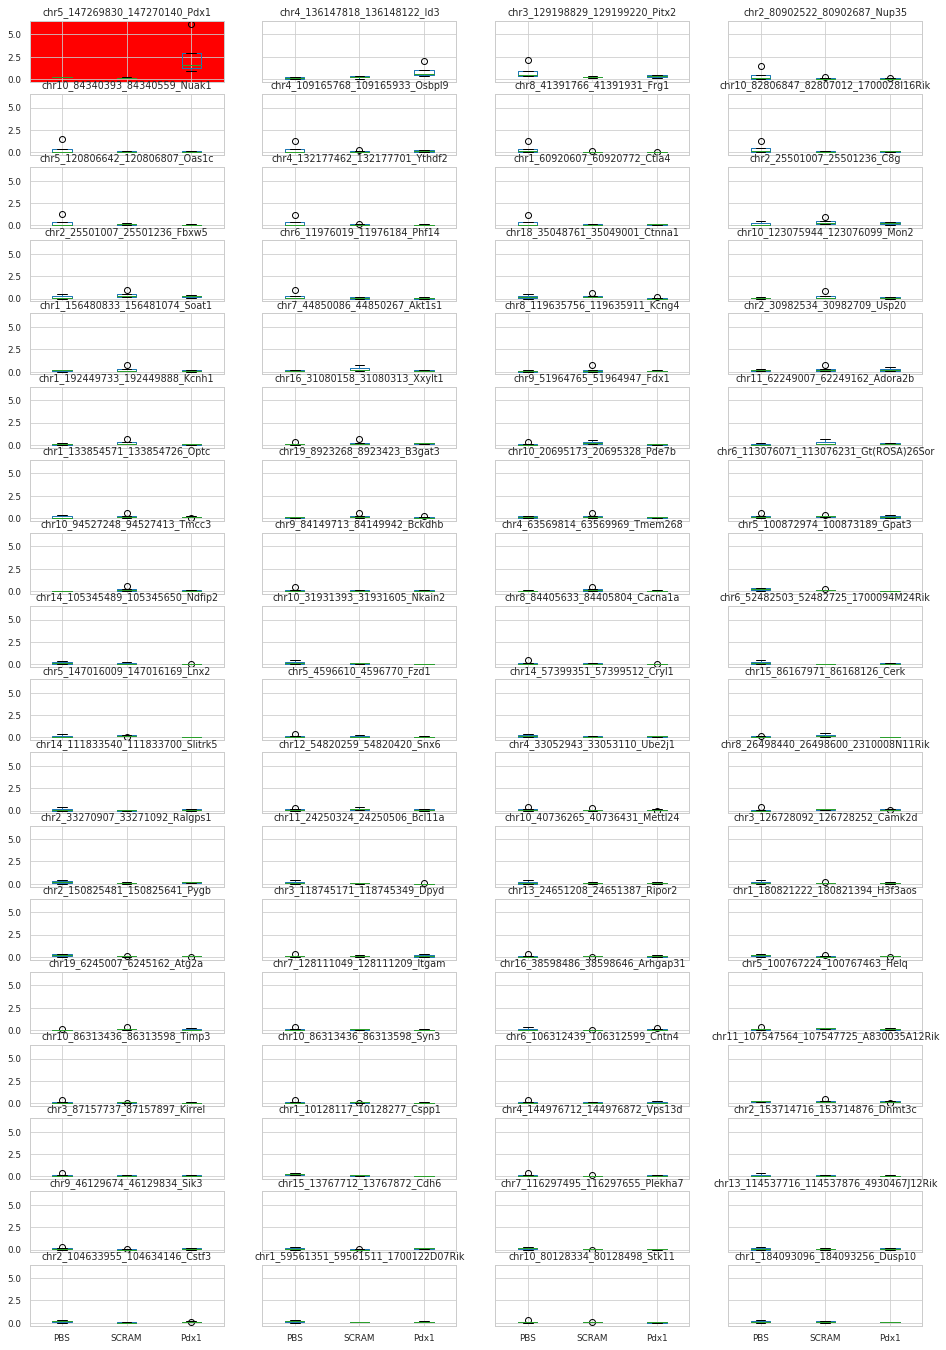

In [4]:
from matplotlib import pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42

ncols = 4
nrows = int(np.ceil(df.shape[0] / ncols))
figg, axes = plt.subplots(nrows, ncols, sharey=True, figsize=[16, 24])
for ix, ii in enumerate(df.var(axis=1).sort_values(ascending=False).index):
    fig = df.loc[df.index==ii,: ].T.groupby(level=0, axis=0)\
        .boxplot(
            subplots=False, 
            ax = axes.flatten()[ix]
        )
    if gene_of_interest in ii:
        fig.axes.set_facecolor('r')
    if ix>=((nrows-1)*ncols):
        fig.axes.set_xticklabels(['PBS', 'SCRAM', 'Pdx1']);
    else:
        fig.axes.set_xticklabels([]);
    fig.axes.set_title(ii);


In [5]:
figg.tight_layout()
figg.savefig('/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/plots/mmLiver_p300.flag.union_peakset_no_input.cpms.gridplot.pdf')

In [ ]:
df.to_csv('/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/counts/mmLiver_p300.flag.union_peakset.cpms.txt',sep='\t')

Matt is interested in quantify the enrichment of p300 signal in the p300-FLAG samples compared with PBS and scram guides, also looking at enrichment of K27ac signal. 
Conversely, for samples treated with KRAB he would like to quantify the gain of signal of KRAB in FLAG samples versus scram and PBS, also looking at enrichment of K9me3 signal.

- [ ] Use the peaksets of K27ac and K9me3 to quantify signal in those peaks.

In [4]:
%%bash
module load bedtools2
# Create union peakset for FLAG-p300 samples:
cat /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_p300.K27ac.{targeted,scram,PBS}.rep*.masked.dedup.sorted_peaks.narrowPeak \
| /bin/grep "^chr" \
| sort -k1,1 -k2,2n \
| bedtools merge -nonamecheck -i stdin \
| sort -k1,1 -k2,2n \
| bedtools intersect -wa -v -a stdin -b /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_p300.[Ii]nput.{targeted,scram,PBS}.rep*.masked.dedup.sorted_peaks.narrowPeak \
| bedtools closest \
    -nonamecheck \
    -a stdin \
    -b <(sort -k1,1 -k2,2n /data/reddylab/Reference_Data/Gencode/vM19/gencode.vM19.basic.annotation.no_gm.bed) \
> /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_p300.K27ac.union_peakset_no_input.bed

***** WARNING: File /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_p300.input.targeted.rep6.masked.dedup.sorted_peaks.narrowPeak has inconsistent naming convention for record:
chr1	16008185	16008325	mmLiver_p300.input.rep6.masked.dedup.sorted_peak_38	100	.	7.29233	15.18408	10.01622	101

***** WARNING: File /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_p300.input.targeted.rep6.masked.dedup.sorted_peaks.narrowPeak has inconsistent naming convention for record:
chr1	16008185	16008325	mmLiver_p300.input.rep6.masked.dedup.sorted_peak_38	100	.	7.29233	15.18408	10.01622	101



In [4]:
%%bash
module load bedtools2
cat \
    <(awk -vOFS="\t" '{$2=($2+$3)/2;$3=$2+1; print $0}' /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_p300.flag.union_peakset_no_input.bed | bedtools slop -i stdin -b 1000 -g /data/reddylab/Reference_Data/Genomes/mm10/GRCm38.header.sizes) \
    /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_p300.K27ac.union_peakset_no_input.bed \
| sort -k1,1 -k2,2n \
| bedtools merge -i stdin \
| bedtools closest \
    -nonamecheck \
    -a stdin \
    -b <(sort -k1,1 -k2,2n /data/reddylab/Reference_Data/Gencode/vM19/gencode.vM19.basic.annotation.no_gm.bed) \
> /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_p300.K27ac.union_peakset_no_input_plus_flag.bed

In [5]:
!wc -l /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_p300.K27ac.union_peakset_no_input_plus_flag.bed

134294 /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_p300.K27ac.union_peakset_no_input_plus_flag.bed


In [6]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex
python /data/reddylab/Alex/reddylab_utils/scripts/bed_to_saf.py \
    -beds  /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_p300.K27ac.union_peakset_no_input_plus_flag.bed \
    -safs  /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_p300.K27ac.union_peakset_no_input_plus_flag.saf
    

In [7]:
%%bash
/data/reddylab/software/subread-1.4.6-p4-Linux-x86_64/bin/featureCounts \
    -F SAF \
    -a /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_p300.K27ac.union_peakset_no_input_plus_flag.saf \
    -o /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/counts/mmLiver_p300.K27ac.union_peakset_no_input_plus_flag.featureCounts.txt \
    /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_p300.K27ac.{targeted,scram,PBS}.rep*masked.dedup.sorted.bam  \
> /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/logs/mmLiver_p300.K27ac.union_peakset_no_input_plus_flag.featureCounts.out \
2>&1
